Impoerta bibliotek

In [1]:
# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

c:\Users\Alia-\anaconda30\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Läs in och utforska datasetet

In [2]:
file_path = "Housing.csv"  
data = pd.read_csv(file_path)

# Visa de första raderna
print("De första raderna av datasetet:")
print(data.head())

# Kontrollera datasetets struktur
print("\nDatasetets information:")
print(data.info())

# Statistisk sammanfattning av numeriska kolumner
print("\nStatistisk sammanfattning:")
print(data.describe())

De första raderna av datasetet:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Datasetets information:
<class 'pandas.core.frame.DataFrame'>
Rang

Dataanalys och visualisering

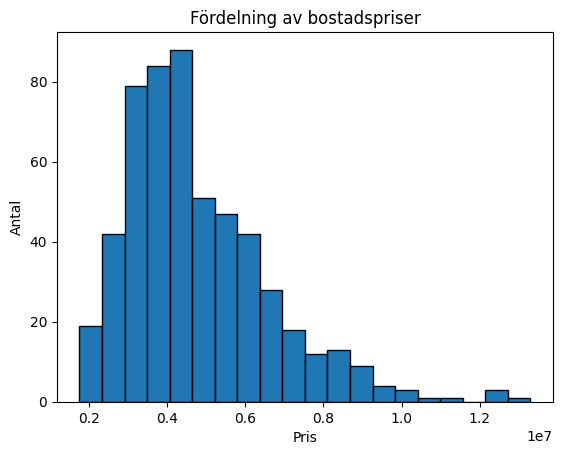

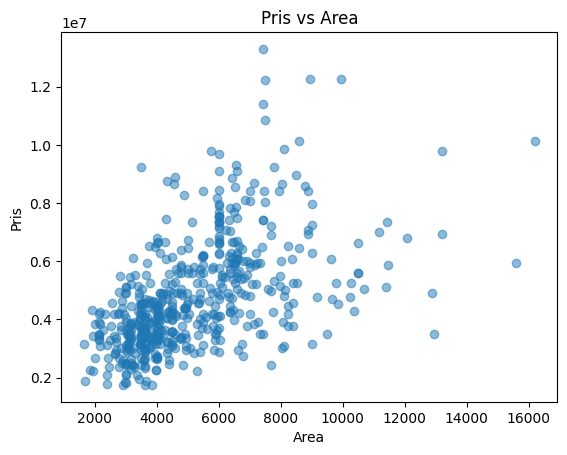

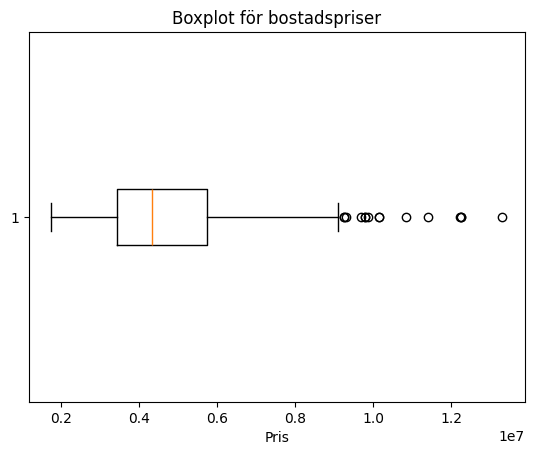

In [3]:
# Histogram för bostadspriser
plt.hist(data['price'], bins=20, edgecolor='black')
plt.title('Fördelning av bostadspriser')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.show()

# Scatter plot för pris och area
plt.scatter(data['area'], data['price'], alpha=0.5)
plt.title('Pris vs Area')
plt.xlabel('Area')
plt.ylabel('Pris')
plt.show()

# Boxplot för bostadspriser
plt.boxplot(data['price'], vert=False)
plt.title('Boxplot för bostadspriser')
plt.xlabel('Pris')
plt.show()

Förbehandling av data

In [4]:
kategoriska_variabler = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Omvandla kategoriska variabler till numeriska
for kolumn in kategoriska_variabler:
    if kolumn in data.columns:
        data[kolumn] = data[kolumn].map({'yes': 1, 'no': 0})

# Omvandla furnishingstatus till dummy-variabler
if 'furnishingstatus' in data.columns:
    data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Hantera outliers
data = data[data['price'] < 10000000]

# Log-transformera målvariabeln
data['log_price'] = np.log(data['price'])

 Korrelationsmatris

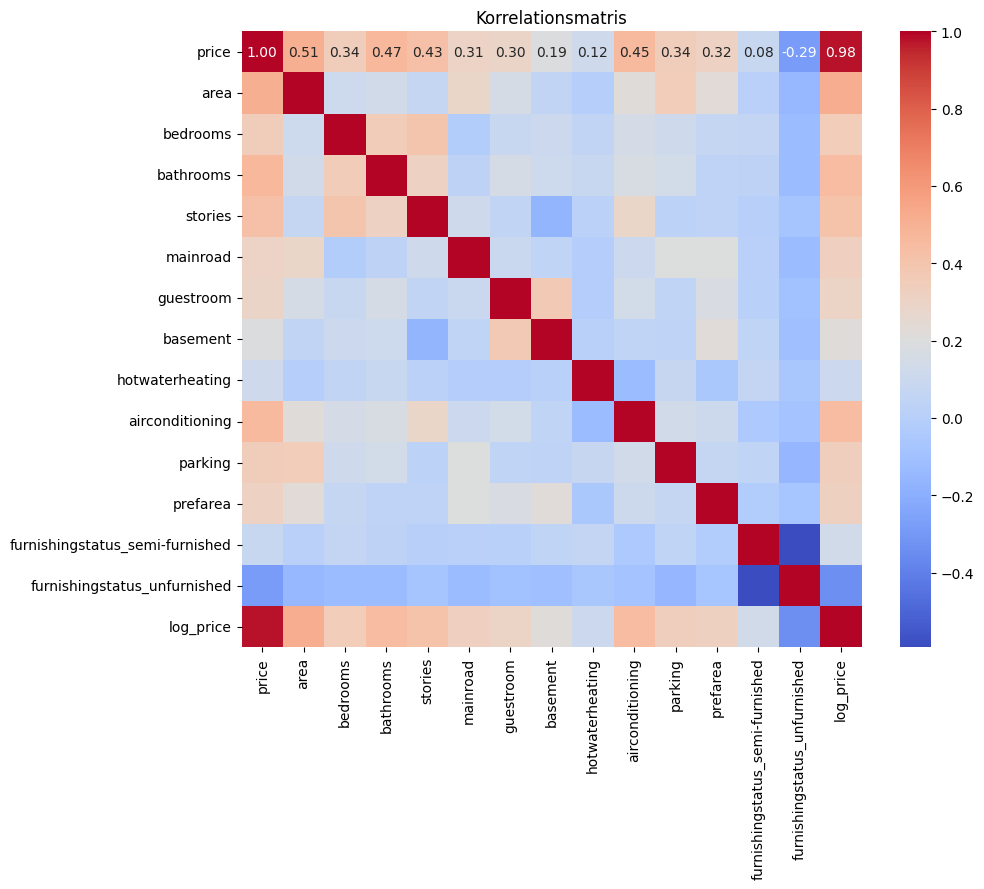

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatris')
plt.show()

Dela upp data

In [6]:
# Separera features och målvariabel
X = data.drop(columns=['price', 'log_price'])  # Exkludera både original och log-transformerad price
y = data['log_price']

# Dela upp data i tränings- och testuppsättningar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Träningsdata:", X_train.shape)
print("Testdata:", X_test.shape)

Träningsdata: (429, 13)
Testdata: (108, 13)


Linjär regression

In [7]:
# Träna modellen
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Korsvalidering för linjär regression
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("\nLinjär regression med korsvalidering:")
print(f"Genomsnittligt MAE: {-linear_cv_scores.mean():.2f}")
print(f"Standardavvikelse för MAE: {linear_cv_scores.std():.2f}")

# Prediktioner och utvärdering
y_pred = linear_model.predict(X_test)
y_pred_original = np.exp(y_pred)  # Återgå till originalskalan
y_test_original = np.exp(y_test)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print("\nLinjär regression med log-transformering:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Linjär regression med korsvalidering:
Genomsnittligt MAE: 0.16
Standardavvikelse för MAE: 0.00

Linjär regression med log-transformering:
Mean Absolute Error (MAE): 791076.37
Root Mean Squared Error (RMSE): 1039104.19
R-squared (R2): 0.72


Random Forest

In [8]:
# Träna modellen
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Korsvalidering för Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("\nRandom Forest med korsvalidering:")
print(f"Genomsnittligt MAE: {-rf_cv_scores.mean():.2f}")
print(f"Standardavvikelse för MAE: {rf_cv_scores.std():.2f}")

# Prediktioner och utvärdering
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_original = np.exp(y_pred_rf)


rf_mae = mean_absolute_error(y_test_original, y_pred_rf_original)
rf_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
rf_r2 = r2_score(y_test_original, y_pred_rf_original)

print("\nRandom Forest med log-transformering:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")


Random Forest med korsvalidering:
Genomsnittligt MAE: 0.17
Standardavvikelse för MAE: 0.01

Random Forest med log-transformering:
Mean Absolute Error (MAE): 851407.32
Root Mean Squared Error (RMSE): 1212005.50
R-squared (R2): 0.61


Grid Search för Random Forest

In [10]:
# Optimera Random Forest med GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Bästa parametrar för Random Forest:", grid_search.best_params_)

# Utvärdering av den bästa modellen
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_pred_rf_tuned_original = np.exp(y_pred_rf_tuned)

rf_mae_tuned = mean_absolute_error(y_test_original, y_pred_rf_tuned_original)
rf_rmse_tuned = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_tuned_original))
rf_r2_tuned = r2_score(y_test_original, y_pred_rf_tuned_original)

print("\nOptimerad Random Forest:")
print(f"Mean Absolute Error (MAE): {rf_mae_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse_tuned:.2f}")
print(f"R-squared (R2): {rf_r2_tuned:.2f}")

Bästa parametrar för Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Optimerad Random Forest:
Mean Absolute Error (MAE): 872953.38
Root Mean Squared Error (RMSE): 1192203.00
R-squared (R2): 0.63


Visualisera funktionernas betydelse


Funktionernas betydelse:
                           Funktion  Betydelse
0                              area   0.320902
2                         bathrooms   0.111706
3                           stories   0.081353
8                   airconditioning   0.080756
1                          bedrooms   0.076116
9                           parking   0.072403
12     furnishingstatus_unfurnished   0.049405
6                          basement   0.044899
4                          mainroad   0.041900
10                         prefarea   0.041666
5                         guestroom   0.031576
11  furnishingstatus_semi-furnished   0.027731
7                   hotwaterheating   0.019588


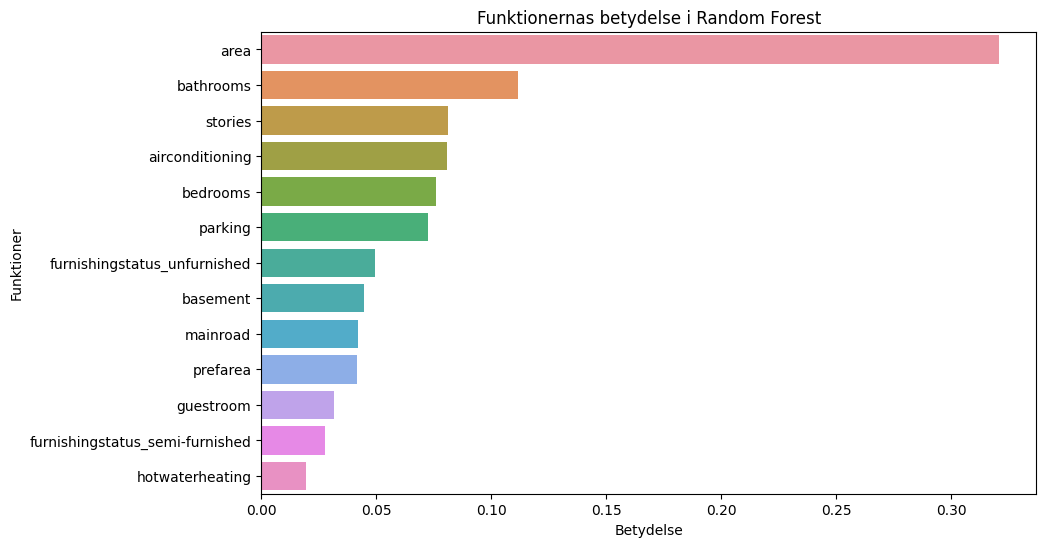

In [11]:
importances = best_rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Funktion': feature_names, 'Betydelse': importances})
importance_df = importance_df.sort_values(by='Betydelse', ascending=False)

print("\nFunktionernas betydelse:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Betydelse'], y=importance_df['Funktion'])
plt.title('Funktionernas betydelse i Random Forest')
plt.xlabel('Betydelse')
plt.ylabel('Funktioner')
plt.show()

Residualplot för Random Forest

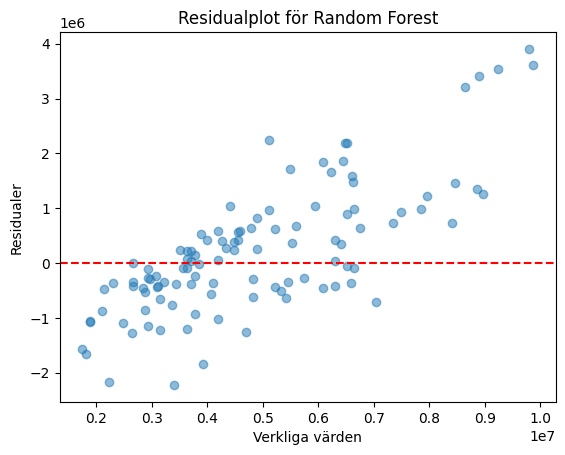

In [12]:
residuals = y_test_original - y_pred_rf_tuned_original
plt.scatter(y_test_original, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Verkliga värden')
plt.ylabel('Residualer')
plt.title('Residualplot för Random Forest')
plt.show()

Standardisera funktionerna

In [13]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


Support Vector Regression

In [14]:
param_grid_svr = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear']
}
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=3, scoring='neg_mean_absolute_error')
grid_search_svr.fit(X_train_scaled, y_train_scaled)

print("Bästa parametrar för SVR:", grid_search_svr.best_params_)

# Träna modellen med optimerade parametrar
svr_model = grid_search_svr.best_estimator_
svr_model.fit(X_train_scaled, y_train_scaled)

# Korsvalidering för SVR
svr_cv_scores = cross_val_score(svr_model, X_train_scaled, y_train_scaled, cv=5, scoring='neg_mean_absolute_error')
print("\nSupport Vector Regression med korsvalidering:")
print(f"Genomsnittligt MAE: {-svr_cv_scores.mean():.2f}")
print(f"Standardavvikelse för MAE: {svr_cv_scores.std():.2f}")

# Prediktioner med SVR
y_pred_svr_scaled = svr_model.predict(X_test_scaled)

# Återgå till originalskalan
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Utvärdering
svr_mae = mean_absolute_error(y_test_original, y_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_svr))
svr_r2 = r2_score(y_test_original, y_pred_svr)

print("\nSupport Vector Regression:")
print(f"Mean Absolute Error (MAE): {svr_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse:.2f}")
print(f"R-squared (R2): {svr_r2:.2f}")

Bästa parametrar för SVR: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

Support Vector Regression med korsvalidering:
Genomsnittligt MAE: 0.46
Standardavvikelse för MAE: 0.01

Support Vector Regression:
Mean Absolute Error (MAE): 0.18
Root Mean Squared Error (RMSE): 0.23
R-squared (R2): 0.68


Residualplot för Support Vector Regression

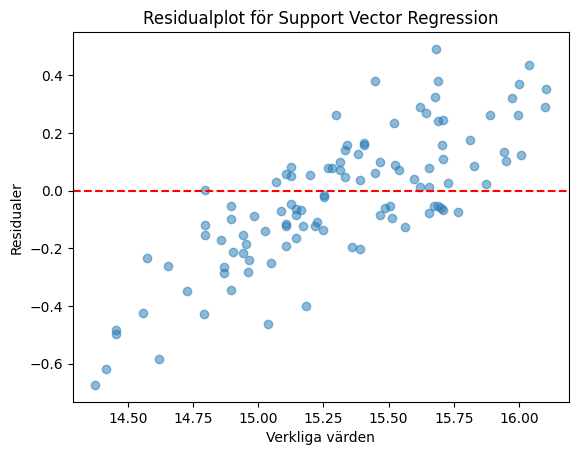

In [15]:
residuals_svr = y_test_original - y_pred_svr
plt.scatter(y_test_original, residuals_svr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Verkliga värden')
plt.ylabel('Residualer')
plt.title('Residualplot för Support Vector Regression')
plt.show()